In [1]:
#importing Essential libraries
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the list of stock symbols
stock_symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Fetch data from Yahoo Finance
# Download historical stock data for the specified symbols from 2014-01-01 to 2024-12-04
stock_data = yf.download(stock_symbols, start='2014-01-01', end='2024-12-04')

[*********************100%%**********************]  4 of 4 completed


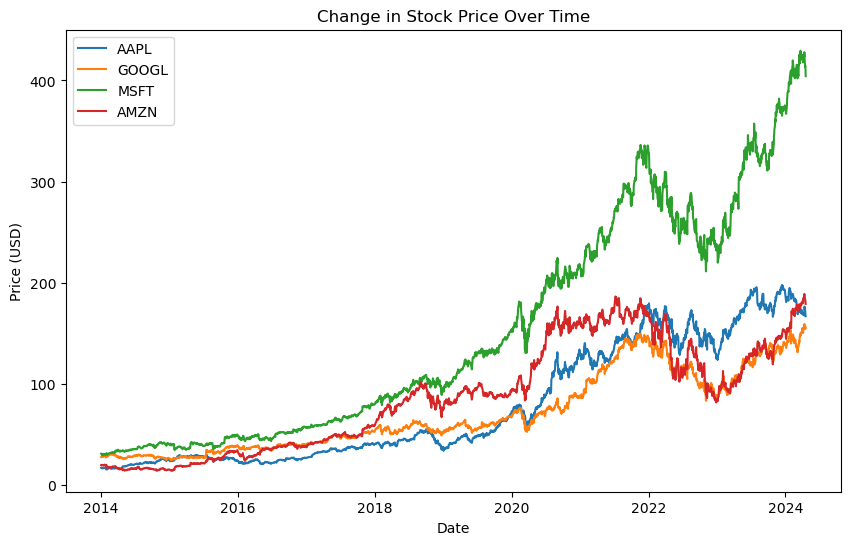

In [2]:
# Create a figure with a specific size for the plot
plt.figure(figsize=(10, 6))

# Iterate over each stock symbol to plot its adjusted close price over time
for stock_symbol in stock_symbols:
    # Plotting the adjusted close price against the date for each stock symbol
    plt.plot(stock_data.index, stock_data['Adj Close'][stock_symbol], label=stock_symbol)

# Adding title and labels to the plot
plt.title('Change in Stock Price Over Time')  # Title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Price (USD)')  # Label for the y-axis

# Adding a legend to differentiate between different stock symbols
plt.legend()

# Display the plot
plt.show()

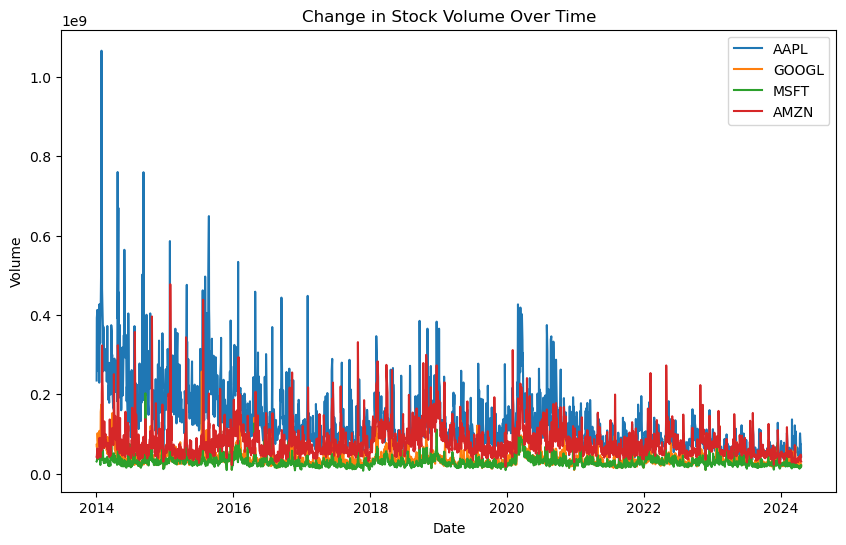

In [3]:
# Create a figure with a specific size for the plot
plt.figure(figsize=(10, 6))

# Iterate over each stock symbol to plot its trading volume over time
for stock_symbol in stock_symbols:
    # Plotting the trading volume against the date for each stock symbol
    plt.plot(stock_data.index, stock_data['Volume'][stock_symbol], label=stock_symbol)

# Adding title and labels to the plot
plt.title('Change in Stock Volume Over Time')  # Title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Volume')  # Label for the y-axis

# Adding a legend to differentiate between different stock symbols
plt.legend()

# Display the plot
plt.show()

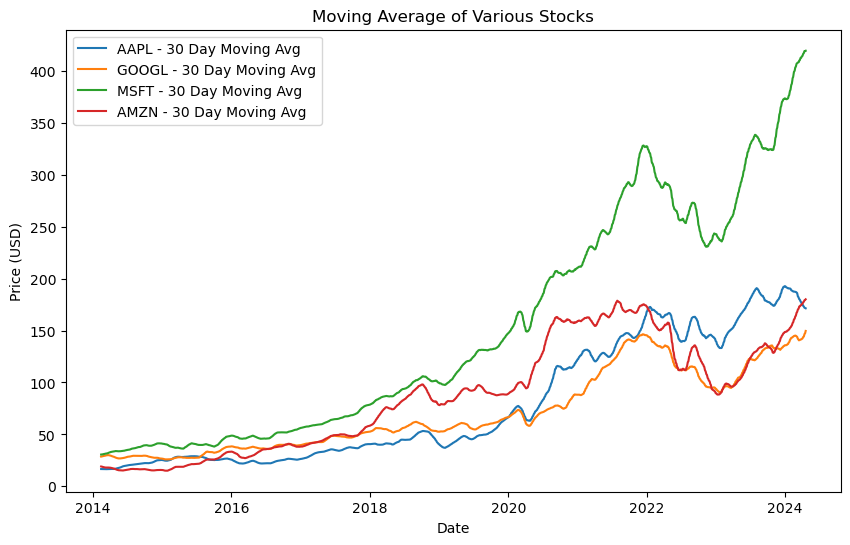

In [4]:
# Define the window size for the moving average calculation
window_size = 30

# Create a new figure with a specific size for the plot
plt.figure(figsize=(10, 6))

# Iterate over each stock symbol to calculate and plot its moving average over time
for stock_symbol in stock_symbols:
    # Calculate the moving average for the adjusted close price of each stock symbol
    stock_data['Moving Average', stock_symbol] = stock_data['Adj Close'][stock_symbol].rolling(window=window_size).mean()
    
    # Plotting the moving average against the date for each stock symbol
    plt.plot(stock_data.index, stock_data['Moving Average', stock_symbol], label=f'{stock_symbol} - {window_size} Day Moving Avg')

# Adding title and labels to the plot
plt.title('Moving Average of Various Stocks')  # Title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Price (USD)')  # Label for the y-axis

# Adding a legend to differentiate between different stock symbols and their respective moving averages
plt.legend()

# Display the plot
plt.show()


In [5]:
# Calculate the daily percentage change for each stock's adjusted close price
daily_return = stock_data['Adj Close'].pct_change()

# Calculate the average daily return across all stocks
daily_return_avg = daily_return.mean()

# Print the average daily return
print('Daily Return Average:')
print(daily_return_avg)

Daily Return Average:
Ticker
AAPL     0.001034
AMZN     0.001064
GOOGL    0.000819
MSFT     0.001132
dtype: float64


In [6]:
# Define function to determine trend based on daily return
def determine_trend(x):
    if x > 0:
        return 'Up'
    elif x < 0:
        return 'Down'
    else:
        return 'No Change'

# Create an empty DataFrame to store trends for each stock
trend_data = pd.DataFrame(index=stock_data.index)

# Calculate and store trend for each stock
for stock_symbol in stock_symbols:
    # Calculate the percentage change in adjusted close price for each stock
    percentage_change = stock_data['Adj Close'][stock_symbol].pct_change()
    
    # Apply the determine_trend function to get the trend (Up, Down, No Change)
    trend_data[stock_symbol] = percentage_change.apply(determine_trend)

# Combine trends for all stocks into a single 'Trend' column
trend_data['Trend'] = trend_data.apply(lambda row: ', '.join(row.dropna()), axis=1)

# The 'Trend' column now contains the trend information for all stocks on each date


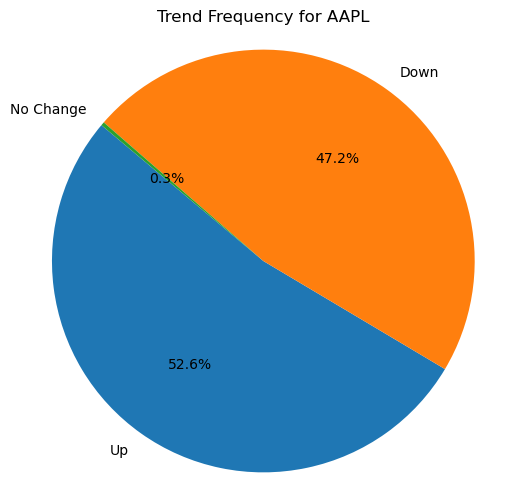

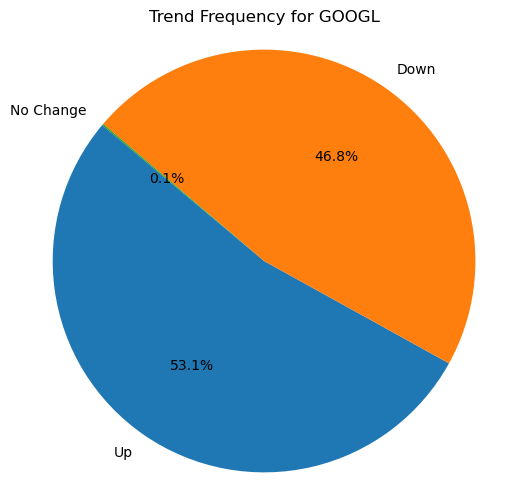

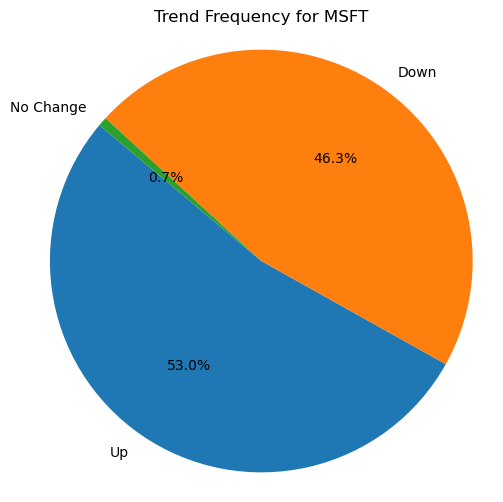

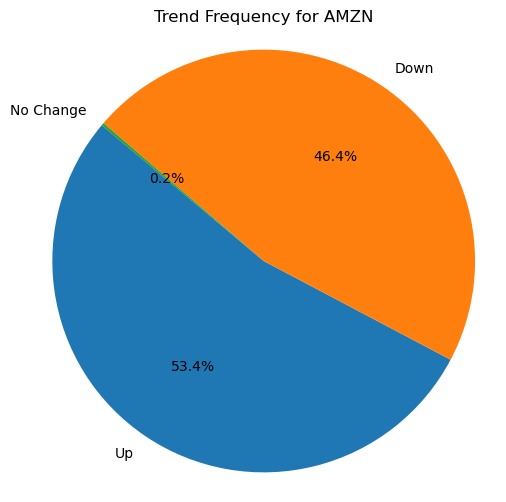

In [7]:
# Iterate over each stock symbol
for stock_symbol in stock_symbols:
    # Count the frequency of each trend for the current stock
    trend_counts = trend_data[stock_symbol].value_counts()

    # Plot a pie chart for the current stock
    plt.figure(figsize=(6, 6))  # Set the size of the figure
    plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=140)  # Plot the pie chart
    plt.title(f'Trend Frequency for {stock_symbol}')  # Add title to the plot
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()  # Show the plot


In [8]:
# Calculate the correlation matrix of the daily returns of different stocks
correlation_matrix = stock_data['Adj Close'].pct_change().corr()

# Print the correlation matrix
print('Correlation Between the Daily Returns of Different Stocks:')
print(correlation_matrix)


Correlation Between the Daily Returns of Different Stocks:
Ticker      AAPL      AMZN     GOOGL      MSFT
Ticker                                        
AAPL    1.000000  0.538361  0.598907  0.667090
AMZN    0.538361  1.000000  0.637655  0.623175
GOOGL   0.598907  0.637655  1.000000  0.708439
MSFT    0.667090  0.623175  0.708439  1.000000


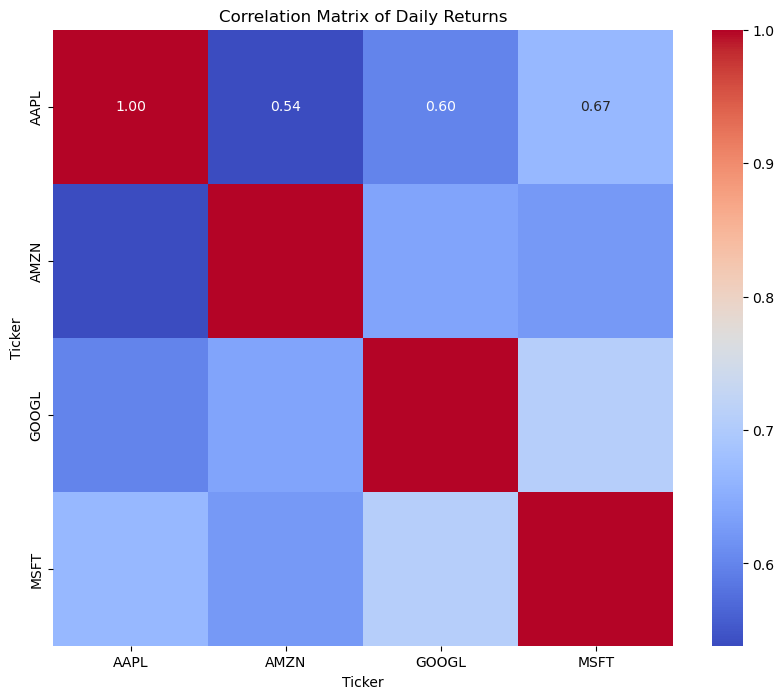

In [9]:
import seaborn as sns  # Import seaborn for visualization

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Plot the heatmap with annotations and specific colormap
plt.title('Correlation Matrix of Daily Returns')  # Add title to the plot
plt.show()  # Show the plot


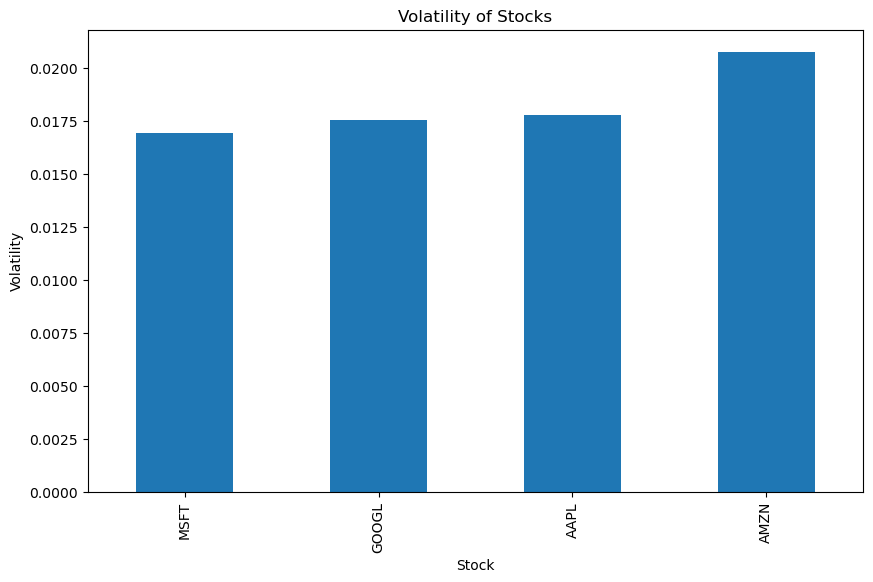

In [10]:
# Calculate volatility (standard deviation of daily returns) for each stock
volatility = stock_data['Adj Close'].pct_change().std()

# Create a bar plot to visualize the volatility of each stock
plt.figure(figsize=(10, 6))  # Set the size of the figure
volatility.sort_values().plot(kind='bar')  # Plot the volatility values sorted in ascending order
plt.title('Volatility of Stocks')  # Add title to the plot
plt.xlabel('Stock')  # Label for the x-axis
plt.ylabel('Volatility')  # Label for the y-axis
plt.show()  # Show the plot


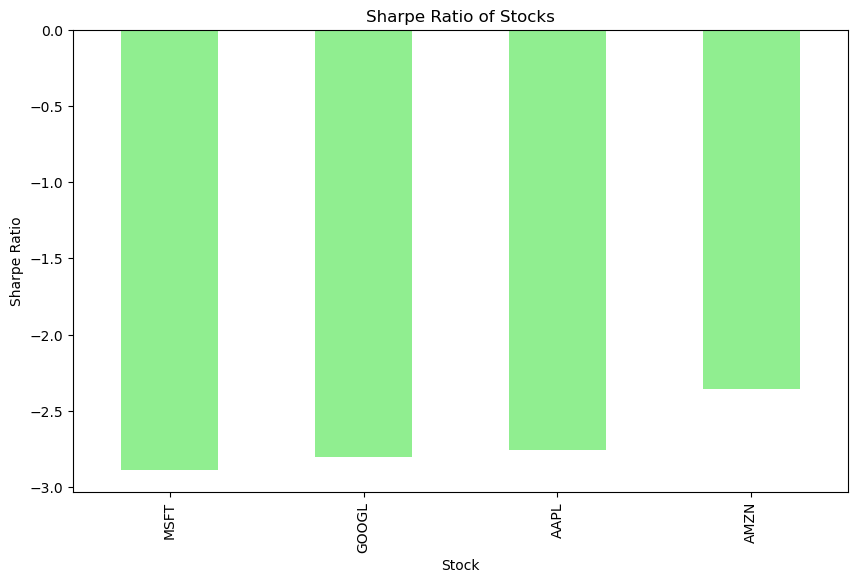

In [11]:
# Assuming risk-free rate
risk_free_rate = 0.05

# Calculate Sharpe Ratio for each stock
sharpe_ratio = (daily_return_avg - risk_free_rate) / volatility

# Create a bar plot to visualize the Sharpe Ratio of each stock
plt.figure(figsize=(10, 6))  # Set the size of the figure
sharpe_ratio.sort_values().plot(kind='bar', color='lightgreen')  # Plot the Sharpe Ratio values sorted in ascending order
plt.title('Sharpe Ratio of Stocks')  # Add title to the plot
plt.xlabel('Stock')  # Label for the x-axis
plt.ylabel('Sharpe Ratio')  # Label for the y-axis
plt.show()  # Show the plot


In [12]:
# Calculate the expected returns for each stock
expected_returns = stock_data['Adj Close'].pct_change().mean()

# Calculate the covariance matrix for the daily returns of different stocks
covariance_matrix = stock_data['Adj Close'].pct_change().cov()


In [13]:
expected_returns

Ticker
AAPL     0.001034
AMZN     0.001064
GOOGL    0.000819
MSFT     0.001132
dtype: float64

In [14]:
covariance_matrix

Ticker,AAPL,AMZN,GOOGL,MSFT
Ticker,,,,
AAPL,0.000316,0.000199,0.000187,0.000201
AMZN,0.000199,0.000431,0.000232,0.000219
GOOGL,0.000187,0.000232,0.000308,0.000210
MSFT,0.000201,0.000219,0.000210,0.000286


In [15]:
import numpy as np  # Import numpy for numerical calculations

# Define confidence level (e.g., 95%)
confidence_level = 0.95

# Extract daily returns for the stocks and remove any NaN values
daily_returns = stock_data['Adj Close'].pct_change().dropna()

# Calculate VaR (Value at Risk) using historical simulation method
var = np.percentile(daily_returns, 100 * (1 - confidence_level))

# Print VaR at the specified confidence level
print(f'Value at Risk (VaR) at {confidence_level * 100}% confidence level:', var)


Value at Risk (VaR) at 95.0% confidence level: -0.027417559322030695


In [ ]:
#Thank you